In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# Finding inertia values for different cluster counts
inertias = []
K = range(1, 10)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)

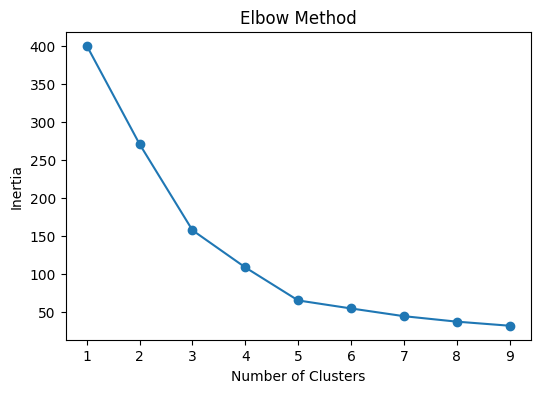

In [8]:
plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
optimal_k = 5

In [10]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Clusters'] = kmeans.fit_predict(x_scaled)


In [11]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)  # convert back to original scale

In [12]:
print("Cluster Centers (Original Scale):")
for i, c in enumerate(centroids_original):
    print(f"Cluster {i}: Income = {c[0]:.2f}, Spending Score = {c[1]:.2f}")


Cluster Centers (Original Scale):
Cluster 0: Income = 55.30, Spending Score = 49.52
Cluster 1: Income = 88.20, Spending Score = 17.11
Cluster 2: Income = 26.30, Spending Score = 20.91
Cluster 3: Income = 25.73, Spending Score = 79.36
Cluster 4: Income = 86.54, Spending Score = 82.13


In [13]:
print("Cluster labels:", df['Clusters'].unique())

Cluster labels: [2 3 0 4 1]


In [14]:
cluster_labels = {
    0: 'Mid Income - Average Spending (Balanced Shoppers)',
    1: 'High Income - Low Spending (Cautious Elites)',
    2: 'Low Income - Low Spending (Budget Customers)',
    3: 'Low Income - High Spending (Impulsive Buyers)',
    4: 'High Income - High Spending (Luxury Shoppers)'
}


In [15]:
df['Cluster Label'] = df['Clusters'].map(cluster_labels)

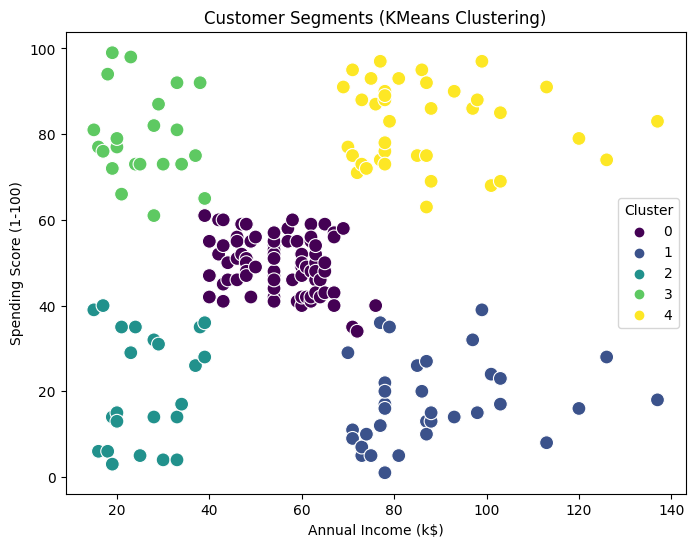

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Clusters',
    data=df,
    palette='viridis',
    s=100
)
plt.title('Customer Segments (KMeans Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

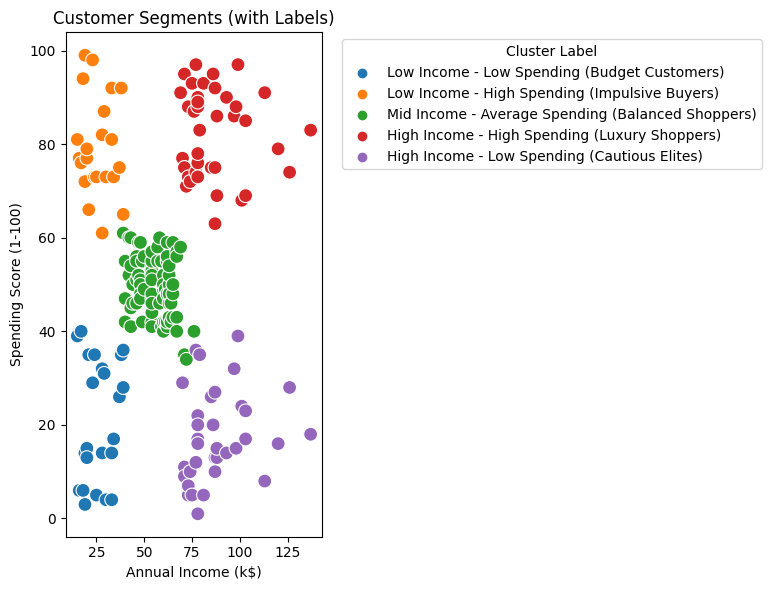

In [17]:
# --- Step 3: Plot using the human-readable labels ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster Label',
    data=df,
    palette='tab10',
    s=100
)
plt.title('Customer Segments (with Labels)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

print("Model saved as 'kmeans_model.pkl'")

Model saved as 'kmeans_model.pkl'


In [20]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved as 'scaler.pkl'")


Scaler saved as 'scaler.pkl'
